In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [4]:
x = np.arange(1, 101)
x = x.reshape(100, 1)

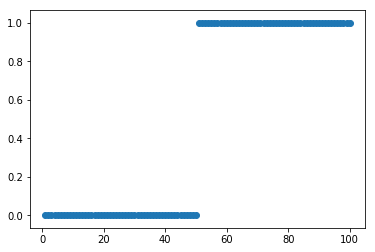

In [5]:
l = []
for i in range(50):
    l.append(0)
    
for i in range(50):
    l.append(1)
    
y = np.array(l).reshape(100, 1)
'''
import random
binary = [0, 1]
y = np.array([random.choice(binary) for i in range(100)])
y = y.reshape(100, 1)
'''
plt.scatter(x, y.T)

In [6]:
import tensorflow as tf

In [7]:
x_in = tf.placeholder(tf.float32, shape=[None, 1], name='x')
y_in = tf.placeholder(tf.float32, shape=None, name='y')

In [8]:
w = tf.get_variable('w', dtype=tf.float32, shape=[1,1], initializer=tf.contrib.layers.xavier_initializer())
b = tf.get_variable('b', dtype=tf.float32, shape=[1,1], initializer=tf.contrib.layers.xavier_initializer())

In [9]:
y_pred = tf.matmul(w, tf.transpose(x_in)) + b

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_in, logits=y_pred)
loss = tf.reduce_mean(loss)
opt = tf.train.GradientDescentOptimizer(0.001)
train = opt.minimize(loss)

In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(40000):
        sess.run(train, feed_dict={x_in:x, y_in:y})
        if step%4000==0:
            print("loss: ", sess.run(loss, feed_dict={x_in:x, y_in:y}))
            print("loss: ", sess.run([w, b]))
            y_bckup = sess.run(y_pred, feed_dict={x_in:x, y_in:y})

loss:  32.450092
loss:  [array([[1.2781401]], dtype=float32), array([[0.349041]], dtype=float32)]
loss:  0.6951392
loss:  [array([[-0.00379896]], dtype=float32), array([[0.25454766]], dtype=float32)]
loss:  0.69436723
loss:  [array([[-0.00297167]], dtype=float32), array([[0.1991055]], dtype=float32)]
loss:  0.6938933
loss:  [array([[-0.00232398]], dtype=float32), array([[0.1557049]], dtype=float32)]
loss:  0.6936031
loss:  [array([[-0.00181719]], dtype=float32), array([[0.12174843]], dtype=float32)]
loss:  0.69342566
loss:  [array([[-0.00142079]], dtype=float32), array([[0.09518942]], dtype=float32)]
loss:  0.69331956
loss:  [array([[-0.0011108]], dtype=float32), array([[0.07442054]], dtype=float32)]
loss:  0.6932515
loss:  [array([[-0.00086841]], dtype=float32), array([[0.05818138]], dtype=float32)]
loss:  0.6932118
loss:  [array([[-0.0006789]], dtype=float32), array([[0.04548492]], dtype=float32)]
loss:  0.6931856
loss:  [array([[-0.00053074]], dtype=float32), array([[0.03555879]], d

In [ ]:
plt.scatter(x, y.T)
plt.plot(x, y_bckup.T, c='r')